クラスター数が既知の場合にKmeansを利用する

In [1]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

In [2]:
# Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

,class,color,proline
0,1,5.640000,1065
1,1,4.380000,1050
2,1,5.680000,1185
3,1,7.800000,1480
4,1,4.320000,735
5,1,6.750000,1450
6,1,5.250000,1290
7,1,5.050000,1295
8,1,5.200000,1045
9,1,7.220000,1045


In [3]:
# データの整形-------------------------------------------------------
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

<function matplotlib.pyplot.show>

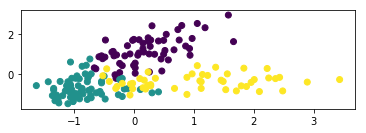

In [4]:
# プロットしてみる------------------------------------------
%matplotlib inline
 
x=X_norm[:,0]
y=X_norm[:,1]
z=df_wine["class"]
plt.subplot(2, 1, 1)
plt.scatter(x,y, c=z)
plt.show

## K-meansの実施

In [5]:
# k-meansを実施---------------------------------
km=cluster.KMeans(n_clusters=3)
z_km=km.fit(X_norm)

<function matplotlib.pyplot.show>

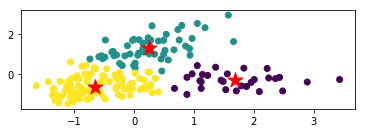

In [6]:
# 結果をプロット-----------------------------------------------
plt.subplot(2, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show

## Minibatch K-meansの実施
データ数が1万個よりも多い場合には、MiniBatchKMeansを使用することが推奨されている。

In [7]:
# ミニバッチk-meansを実施---------------------------------
km=cluster.MiniBatchKMeans(n_clusters=3, batch_size=100)
z_km=km.fit(X_norm)

<function matplotlib.pyplot.show>

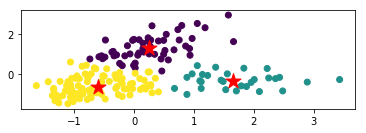

In [8]:
# 結果をプロット-----------------------------------------------
plt.subplot(2, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show